This notebook covers images, maipluating images and convolution.

In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
# Sample image 
#!wget --output-document /data/sample_img.png https://ibm.box.com/shared/static/yqjnv0890doeu3mwb2u97f8rh1p0gd98.png

Image shape: (768, 1024, 3)


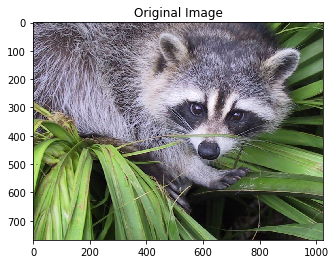

In [3]:
%matplotlib inline

f = misc.face()
gray_f = np.dot(f[...,:3], [0.299, 0.587, 0.114])
plt.imshow(f)
plt.title("Original Image")
print("Image shape: {}".format(f.shape))

Grayscale image shape: (768, 1024)


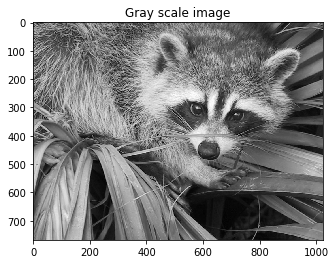

In [4]:
plt.imshow(gray_f,cmap=plt.get_cmap("gray"))
plt.title("Gray scale image")
print("Grayscale image shape: {}".format(gray_f.shape))

When performing convolution on images in tensorflow, the data passed is expected to have * Shape = [Batch_size, Height, Width, Channels] *   
Note the number of channels is three for rgb and one for grayscale. This means we will need to 'expand dimensions' for grayscale (or and singlechannel images) and for individual images. (Twice for individual single-channel images)

In [5]:
Image = np.expand_dims(np.expand_dims(gray_f,0),-1)
print(Image.shape)

(1, 768, 1024, 1)


Out image is now ready to be passed to tensorflow for colvolution. First we want to create a placeholer of the same shap as our data will be then we will be ready to set up our colvolution graph

In [6]:
batch_size = 1
input_dat = tf.placeholder(tf.float32,[batch_size,768,1024,1])

Our weight tensor is expected to be of the shape: * [filter_height, filter_width, in_channels, out_channels] *

In [7]:
filter_shape = [6, 6, 1, 1]
W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1),name="W")


In [8]:
CONV = tf.nn.conv2d(input=input_dat,
                         filter=W,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

In [9]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

In [10]:
result = sess.run(CONV,feed_dict={input_dat:Image})
print(result.shape)

(1, 768, 1024, 1)


In [11]:
vec = np.reshape(result, (1, -1))
out_image= np.reshape(vec,(768,1024))
print(out_image.shape)

(768, 1024)


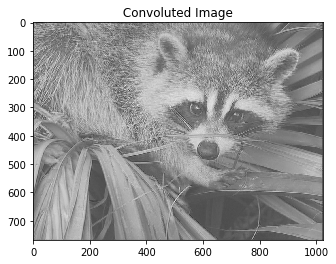

In [12]:
plt.imshow(out_image,cmap=plt.get_cmap("gray"))
plt.title(" Convoluted Image ")